In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Antfile17.CSV')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

In [4]:
#logistic regression
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)


In [7]:
cm = confusion_matrix(y_test, y_pred_log)
print(cm)


[[97 17]
 [24 89]]


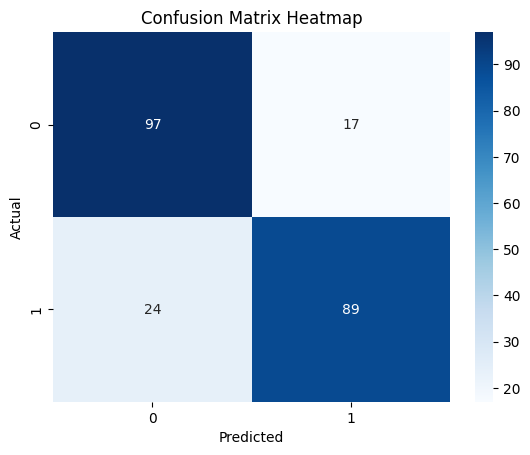

In [8]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       114
           1       0.84      0.79      0.81       113

    accuracy                           0.82       227
   macro avg       0.82      0.82      0.82       227
weighted avg       0.82      0.82      0.82       227



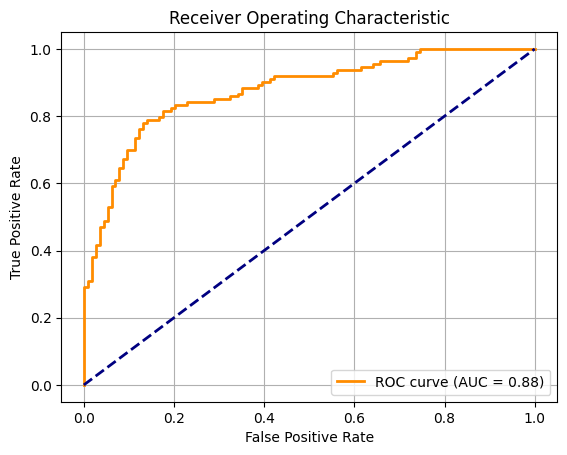

In [10]:
from sklearn.metrics import roc_curve, auc

y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()